In [ ]:
import re
import nltk
nltk.download('book')
from nltk.book import *
from nltk.corpus import stopwords
import numpy as np
import matplotlib.pyplot as plt


[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package dependency_treebank is already up-to-date!
[nltk_data]    | Downloadi

In [ ]:
text1  

<Text: Moby Dick by Herman Melville 1851>

In [ ]:
text1.tokens[:10]

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.']

In [ ]:
print(len(text1))

260819


## Medida de riqueza lexica

In [ ]:
# Palabras únicas
vocabulario = set(text1)
len(vocabulario)

19317

In [ ]:
# Removing stopwords
stop_words = list(stopwords.words('english'))
vocabulario = [word for word in vocabulario if word not in stop_words]
len(vocabulario)

19171

In [ ]:
# Riqueza Lexica
rl = len(vocabulario) / len(text1) 
rl

0.0735030806804719

### Frecuencia de palabras

In [ ]:
# Frecuencia de palabras
fdist = FreqDist(text1)
# Palabras más frecuentes
fdist.most_common(10)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982)]

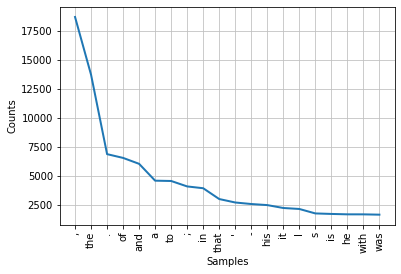

In [ ]:
# Plot
fdist.plot(20)

In [ ]:
long_words = [(palabra, fdist[palabra]) for palabra in vocabulario if len(palabra) > 4 and fdist[palabra] > 10]
long_words[:10]

[('carved', 14),
 ('letter', 12),
 ('greatest', 12),
 ('token', 14),
 ('learned', 25),
 ('Lakeman', 24),
 ('motions', 12),
 ('intervals', 32),
 ('strange', 96),
 ('white', 191)]

In [ ]:
dtypes = [('word', 'object'), ('frecuency', int)]
palabras_frecuentes = np.array(long_words, dtype=dtypes)
palabras_frecuentes = np.sort(palabras_frecuentes, order='frecuency')[::-1]
palabras_frecuentes[:20]

array([('whale', 906), ('would', 421), ('though', 335), ('still', 299),
       ('great', 293), ('seemed', 283), ('Whale', 282), ('Stubb', 255),
       ('Queequeg', 252), ('little', 247), ('round', 242),
       ('whales', 237), ('three', 237), ('every', 222), ('could', 215),
       ('Captain', 215), ('first', 210), ('Starbuck', 196),
       ('never', 195), ('white', 191)],
      dtype=[('word', 'O'), ('frecuency', '<i8')])

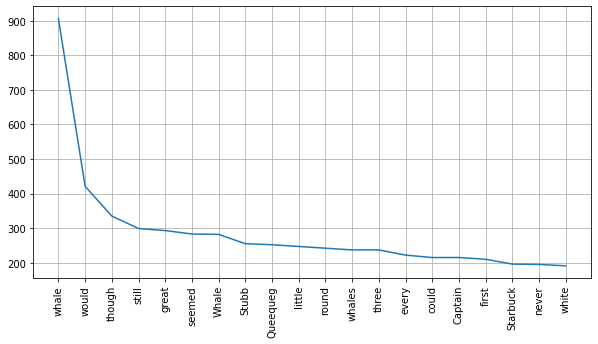

In [ ]:
top_words = 20
x = [word[0] for word in palabras_frecuentes[:top_words:]]
y =  [freq[1] for freq in palabras_frecuentes[:top_words]]
plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.xticks(x, [word[0] for word in palabras_frecuentes[:top_words]], rotation='vertical')
plt.grid()
plt.show()

['whale',
 'would',
 'though',
 'still',
 'great',
 'seemed',
 'Whale',
 'Stubb',
 'Queequeg',
 'little',
 'round',
 'whales',
 'three',
 'every',
 'could',
 'Captain',
 'first',
 'Starbuck',
 'never',
 'white']